In [21]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import scipy.fftpack
import glob
import importlib
import utils
from utils import load_images, display_image, grayscale, normalize, display_grid_of_images, fft_dct, extract_patches
importlib.reload(utils)
#for Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load biofilm and release cell images
biofilm_imgs = load_images('raw_data_reorganized/biofilm')
release_pre_imgs = load_images('raw_data_reorganized/release')

In [22]:
# Discrete Cosine Transforming release cell images
dct_release_imgs = []
for i in range(len(release_pre_imgs)):
    dct_release_img = fft_dct(release_pre_imgs[i])
    dct_release_imgs.append(dct_release_img)

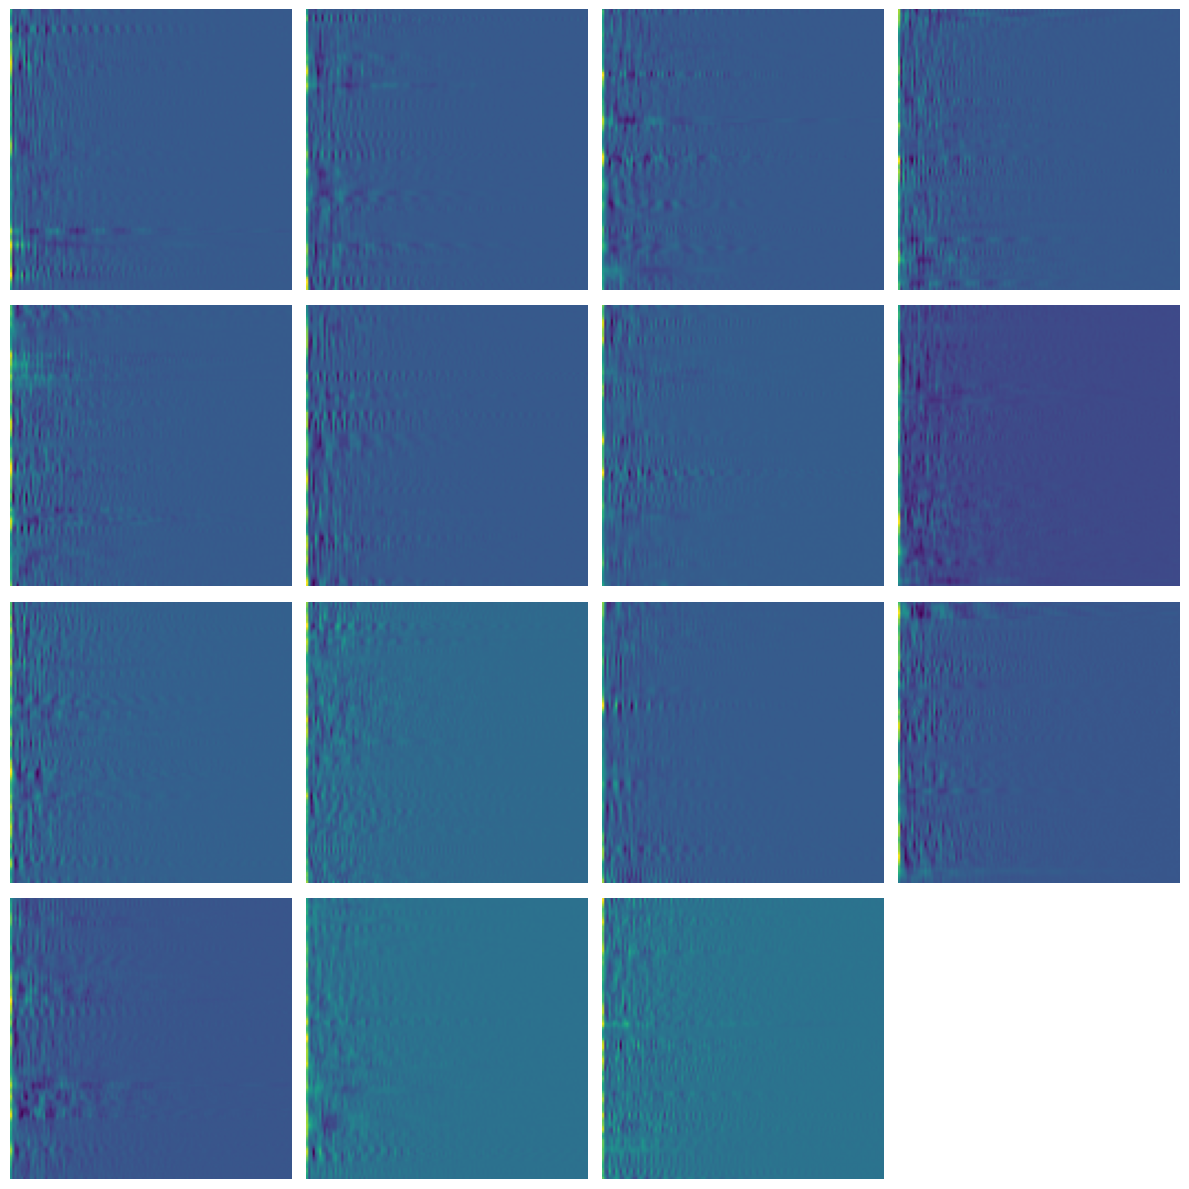

In [23]:
# Extract patches to be transformed using DCT
release_patched_imgs = []
for i in range(len(release_pre_imgs)):
    grayscaled_img = grayscale(release_pre_imgs[i])
    patched_img = extract_patches(grayscaled_img, 128)
    release_patched_imgs.append(patched_img)

dct_release_patched_imgs = []
for i in range(len(release_patched_imgs)):
    dct_patched_img = fft_dct(release_patched_imgs[i])
    dct_release_patched_imgs.append(dct_patched_img)

display_grid_of_images(dct_release_patched_imgs[0][:16])

# Validation-Test-Train Split
the first line is the split of 90% of the data for modeling and 10% for validation. This data is untouched until the end of editing the model to look for confirmation on overfitting or not.

In [24]:
release_dct_model, release_dct_validation = train_test_split(dct_release_imgs, test_size=0.1, random_state=42)

release_patched_dct_model, release_patched_dct_validation = train_test_split(dct_release_patched_imgs, test_size=0.1, random_state=42)


### The remaining split of 80% and 20% for training and testing the model
This is too split the modeling data after the validation into a normal train test split typically seen in modeling.

In [25]:
release_dct_train, release_dct_test = train_test_split(release_dct_model, test_size=0.2, random_state=42)

release_patched_dct_train, release_patched_dct_test = train_test_split(release_patched_dct_model, test_size=0.2, random_state=42)

In [26]:
#convert the biofilm images to surface area calculation
